# Scatter plots

- horizontal x-axis (x축)는 다음과 같이 구성되어 있음
    - `x = df['~~~']`
- vertical y-axis (y축)는 다음과 같이 구성되어 있음
    - `y = df['~~~~']`
    
- **즉, 두 series가 매칭되어 있을 때 산점도를 찍어보는 것이 데이터의 흐름을 파악하기 유의미함!**
- 따라서 두 변수 간의 relationship을 파악하기 쉽다!
- 또한, double-check를 위해서는 회귀선 또는 데이터에 가장 적합한 선을 추가할 수 있는데 이 때 `sns.regplot` 을 이용한다!

### `sns.lmplot`

- 두 변수간의 관계를 파악한 후, 회귀 관계를 보일 때, 그래프 상에 회귀선을 추가할 수 있음!
- 이를 통해 변수에 따른 가파른 기울기 정도도 파악 가능
- sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)
    - hue ='~~~' 를 통해 categorical scatter plot 즉, smoker 의 유무에 따른 색상을 달리 표현하여 산점도 찍을 수 있음
    - 흡연자에 관한 특징 / 비흡연자에 관한 특징을 구별하여 한 눈에 파악 가능!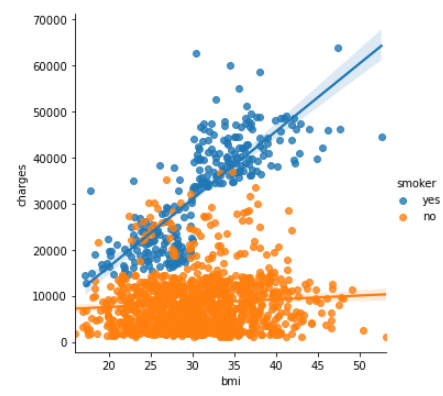

### `sns.swarmplot`

- categorical 변수일 때, 더 명확히 구별하게 할 수 있음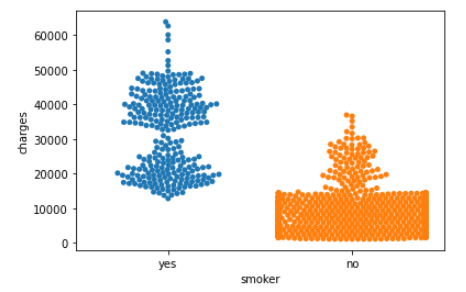

# 실습

In [3]:
import pandas as pd
candy_data = pd.read_csv('data/candy.csv', index_col="id")
candy_data

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Twizzlers,No,Yes,No,No,No,No,No,No,No,0.220,0.116,45.466282
79,Warheads,No,Yes,No,No,No,No,Yes,No,No,0.093,0.116,39.011898
80,Welch's Fruit Snacks,No,Yes,No,No,No,No,No,No,Yes,0.313,0.313,44.375519


The dataset contains 83 rows, where each corresponds to a different candy bar.  There are 13 columns:<br>
83개의 row와 13개의 column

- `'competitorname'` contains the name of the candy bar. 캔디바의 name이 포함

- the next **9** columns (from `'chocolate'` to `'pluribus'`) describe the candy.  :캔디를 설명하는 변수들

For instance, rows with chocolate candies have `"Yes"` in the `'chocolate'` column (and candies without chocolate have `"No"` in the same column).

- `'sugarpercent'` provides some indication of the amount of sugar, where higher values signify higher sugar content.sugar 양 퍼센트
- `'pricepercent'` shows the price per unit, relative to the other candies in the dataset. 다른 캔디와의 상대적인 가격 퍼센트
- `'winpercent'` is calculated from the survey results; higher values indicate that the candy was more popular with survey respondents. 조사결과, 높을수록 인기있는 candy

Use the first five rows of the data to answer the questions below.

## candy 변수에서 인사이트 얻기 

#### scatterplot() 기본

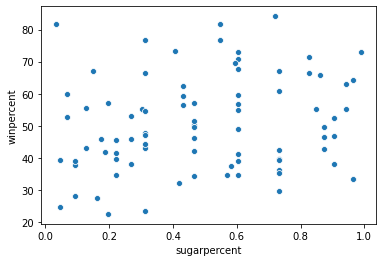

In [5]:
import seaborn as sns
# sugarpercent와 winpercent의 산점도

sns.scatterplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

- 결과 : 강한 correlation은 보이지 않음
- 즉, sugar 함유량이 survey 조사에 큰 영향을 끼치지 않는다는 것을 파악할 수 있다!

#### regression line 을 추가한 scatterplot

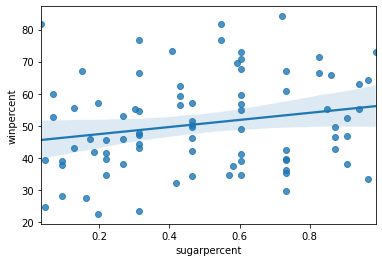

In [6]:
sns.regplot(x=candy_data['sugarpercent'], y=candy_data['winpercent'])

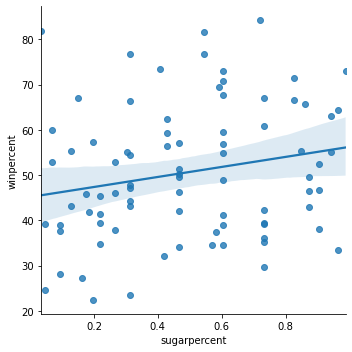

In [7]:
sns.lmplot(x="sugarpercent", y="winpercent", data=candy_data)

- 결과 : 약간의 양의 기울기를 띔
- sugar가 많아지면 약간의 호감을 띄는 조사량을 볼 수 있다 (다소)
- 즉, **regression line**을 추가하면 조금 더 섬세한 분석 결과를 파악할 수 있다! (다소 구체적인 느낌)

## categorical 또는 nominal value 를 이용한 scatter plot

- 초콜릿 유무에 따른

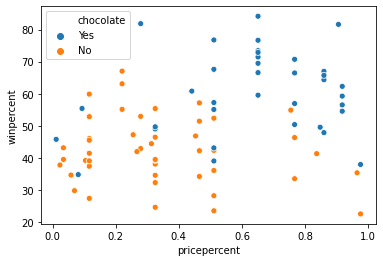

In [9]:
sns.scatterplot(x=candy_data['pricepercent'], y=candy_data['winpercent'], hue=candy_data['chocolate'])

- regression line 추가

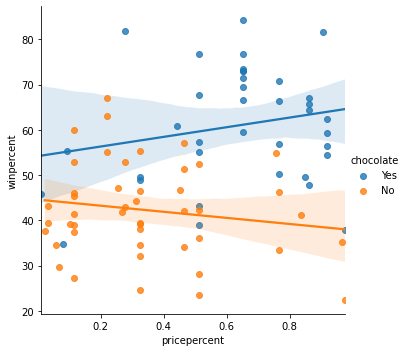

In [10]:
sns.lmplot(x="pricepercent", y="winpercent", hue="chocolate", data=candy_data)

- chocolate 유무에 따라서, 두 가지 분석 방향을 제시 가능!!
- **regression line 2개 생성!!**

- 결과
    - 초콜릿 사탕: 비쌀수록 더 인기가 있는 경향
    - 초콜릿이 없는 사탕 : 값이 저렴할수록 더 인기가 있는 경향
    - **그러나, 데이터가 매우 작기 때문에 이러한 패턴을 맹신해서는 안됨!!**
    - **더 많은 데이터를 추가해야함!!**

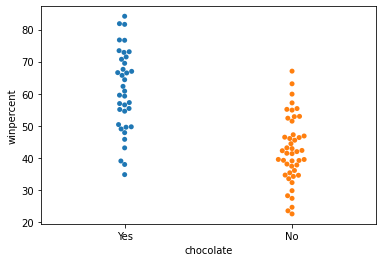

In [11]:
sns.swarmplot(x=candy_data['chocolate'], y=candy_data['winpercent'])

- categorical scatter plot 에 위의 그림보다 더 적절함!
- value별 데이터 분포를 뚜렷하게 파악 가능